# MLP 모델링 및 feature engineering

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
import matplotlib as mpl
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"]=False

#경고 무시
import warnings

# 각 테스트 결과 Case3이 가장 좋음

# Case3
1. SB 변수 제거
2. 운 관련 지표 추가
3. age 변수 추가 X
4. 포지션 칼럼 추가
5. 좌타/우타/양타 칼럼 추가

In [1804]:
regular = pd.read_csv("../Regular_Season_Batter.csv")

# 이상치 제거
regular = regular.drop([480,748,1459,1676,1677,1936,1937], axis=0)
# 신뢰성있는 데이터만 반영
regular = regular.loc[regular["AB"]>10]

## 운 관련 지표 추가

In [1805]:
regular['1B']=regular['H']-regular['2B']-regular['3B']-regular['HR']

regular['1b_luck']=regular['1B']/(regular['AB']-regular['HR']-regular['SO'])
regular['2b_luck']=regular['2B']/(regular['AB']-regular['HR']-regular['SO'])
regular['3b_luck']=regular['3B']/(regular['AB']-regular['HR']-regular['SO'])

## 포지션 칼럼 범주화

In [1806]:
# 포지션 칼럼을 기준으로 내야수/외야수/지명타자/포수의 값을 가지는 or 좌타/우타/양타 
position1 = regular["position"].apply(lambda x: x.split("(")[0])
position2 = regular["position"].apply(lambda x: x.split("(")[1][2:4])

In [1807]:
regular = pd.concat([regular,pd.get_dummies(position1)],axis=1)
regular = pd.concat([regular,pd.get_dummies(position2)],axis=1)

## 변동성이 큰 지표는 total로 값을 넣어줌

In [1808]:
total_1BnAB=[]
total_2BnAB=[]
total_3BnAB=[]
total_avg=[]

for i in range(len(regular)):
    a=regular.loc[(regular["batter_name"]==regular["batter_name"].iloc[i])&(regular["year"]<regular["year"].iloc[i])]
    total_1BnAB.append(a["1B"].sum()/a["AB"].sum())
    total_2BnAB.append(a["2B"].sum()/a["2B"].sum())
    total_3BnAB.append(a["3B"].sum()/a["AB"].sum())
    total_avg.append((a["avg"]*a["AB"]).sum()/a["AB"].sum())

<ipython-input-1808-ca957976fed1>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  total_1BnAB.append(a["1B"].sum()/a["AB"].sum())
<ipython-input-1808-ca957976fed1>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  total_2BnAB.append(a["2B"].sum()/a["2B"].sum())
<ipython-input-1808-ca957976fed1>:10: RuntimeWarning: invalid value encountered in longlong_scalars
  total_3BnAB.append(a["3B"].sum()/a["AB"].sum())
<ipython-input-1808-ca957976fed1>:11: RuntimeWarning: invalid value encountered in double_scalars
  total_avg.append((a["avg"]*a["AB"]).sum()/a["AB"].sum())


In [1809]:
regular["total_1BnAB"]=total_1BnAB
regular["total_2BnAB"]=total_2BnAB
regular["total_3BnAB"]=total_3BnAB
regular['total_avg']=total_avg

## 과거 n개년 데이터를 feature로 만드는 함수

In [1810]:
def make_dataset(n,data):
    # 과거 n개년에 대해서 실행
    for year in range(1,n+1):
        for j in ['avg', 'G', 'AB', 'R', 'H','1B','2B', '3B', 'HR', 'TB', "GDP" ,'RBI','CS',"E",'BB', 'HBP', 'SO', 'SLG', 'OBP', '1b_luck','2b_luck','3b_luck',"OPS"]:
            lag_1_avg=[]
            for i in range(len(data)): 
                if len(data.loc[(data['batter_name']==data['batter_name'].iloc[i])&(data['year']==data['year'].iloc[i]-year)][j])==0:
                    lag_1_avg.append(np.nan)
                else:
                    lag_1_avg.append(data.loc[(data['batter_name']==data['batter_name'].iloc[i])&(data['year']==data['year'].iloc[i]-year)][j].iloc[0])

            data[f'lag_{year}_'+j]=lag_1_avg
            print(f"과거{year}년 {j} 칼럼 완성")
    return data

In [1811]:
data = make_dataset(2,regular)

과거1년 avg 칼럼 완성
과거1년 G 칼럼 완성
과거1년 AB 칼럼 완성
과거1년 R 칼럼 완성
과거1년 H 칼럼 완성
과거1년 1B 칼럼 완성
과거1년 2B 칼럼 완성
과거1년 3B 칼럼 완성
과거1년 HR 칼럼 완성
과거1년 TB 칼럼 완성
과거1년 GDP 칼럼 완성
과거1년 RBI 칼럼 완성
과거1년 CS 칼럼 완성
과거1년 E 칼럼 완성
과거1년 BB 칼럼 완성
과거1년 HBP 칼럼 완성
과거1년 SO 칼럼 완성
과거1년 SLG 칼럼 완성
과거1년 OBP 칼럼 완성
과거1년 1b_luck 칼럼 완성
과거1년 2b_luck 칼럼 완성
과거1년 3b_luck 칼럼 완성
과거1년 OPS 칼럼 완성
과거2년 avg 칼럼 완성
과거2년 G 칼럼 완성
과거2년 AB 칼럼 완성
과거2년 R 칼럼 완성
과거2년 H 칼럼 완성
과거2년 1B 칼럼 완성
과거2년 2B 칼럼 완성
과거2년 3B 칼럼 완성
과거2년 HR 칼럼 완성
과거2년 TB 칼럼 완성
과거2년 GDP 칼럼 완성
과거2년 RBI 칼럼 완성
과거2년 CS 칼럼 완성
과거2년 E 칼럼 완성
과거2년 BB 칼럼 완성
과거2년 HBP 칼럼 완성
과거2년 SO 칼럼 완성
과거2년 SLG 칼럼 완성
과거2년 OBP 칼럼 완성
과거2년 1b_luck 칼럼 완성
과거2년 2b_luck 칼럼 완성
과거2년 3b_luck 칼럼 완성
과거2년 OPS 칼럼 완성


## train set에서 제거해야할 칼럼

In [1812]:
start_idx = list(data.columns).index('3b_luck')

In [1813]:
# total, 최근 1년 변수들과 age변수 반영
input_columns = list(data.columns)[start_idx:]+["OPS"]

## train,test set 분리

In [1844]:
# 전체년도
train = data.loc[data["year"]!=2018,input_columns]
test = data.loc[data["year"]==2018,input_columns]

#  null인 값 제거
train = train.dropna(axis=0)
test = test.dropna(axis=0)

In [1845]:
X_train = train.drop(["OPS"], axis=1)
y_train = train["OPS"]

X_test = test.drop(["OPS"], axis=1)
y_test = test["OPS"]

## Regularize

In [1816]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## MLP

In [1817]:
import tensorflow as tf
from tensorflow import keras

In [1779]:
# 파라미터 초기화 설정
lecun_init = keras.initializers.VarianceScaling(scale=2.,
                                mode="fan_in",distribution="truncated_normal")

In [1822]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("final_mlp_best_model.h5",
                                               save_best_only = True)

model1 = keras.models.Sequential([
    keras.layers.Dense(128, activation = "selu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

learning_rate = 1e-3
max_epoch = 200
model1.compile(loss = "mse", metrics = "mse", optimizer = keras.optimizers.Adam(lr=learning_rate))

history = model1.fit(x=X_train,y=y_train, epochs = max_epoch, 
                           validation_data = (X_test,y_test),
                          batch_size = 16,validation_batch_size=16,
                    callbacks = [checkpoint_cb])

Epoch 1/200
71/71 [==============================] - 1s 11ms/step - loss: 0.1235 - mse: 0.1235 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2/200
71/71 [==============================] - 0s 5ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 3/200
71/71 [==============================] - 0s 4ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 4/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 6/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 7/200
71/71 [==============================] - 0s 4ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 8/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0151 - 

Epoch 125/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 126/200
71/71 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 127/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 128/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 129/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 130/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 131/200
71/71 [==============================] - 0s 2ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 132/200
71/71 [==============================] - 0s 3ms/step - 

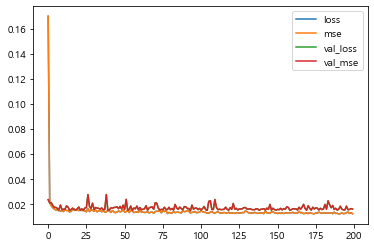

In [1895]:
pd.DataFrame(history.history).plot()

## 모델 성능 평가

In [1823]:
model1 = keras.models.load_model("final_mlp_best_model.h5") # 저장된 모델 불러오기
(model1.evaluate(X_test,y_test)[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.0148 - mean_squared_error: 0.0148


0.014840076677501202

In [1828]:
0.0148**(1/2)

0.1216552506059644

In [1825]:
predicted = model1.predict(X_test)
result = pd.DataFrame(y_test)
result["predicted"]=predicted.flatten()

## 예측값, 실제값 시각화

Text(0, 0.5, 'target_OPS')

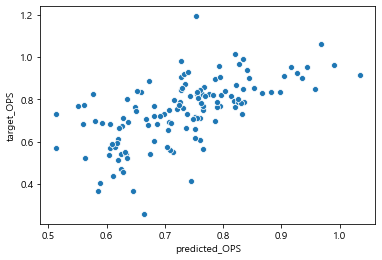

In [1834]:
sns.scatterplot(x="predicted", y="OPS", data = result)
plt.xlabel("predicted_OPS")
plt.ylabel("target_OPS")